In [12]:
import DataModule as dm
import lmfit
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = dm.load_datamodule('./sample_data/2018-08-07-cav-no-ex.dm')
data.plot(plot_fit=0)

bokeh.plotting.figure.Figure(
    id='da6db05f-de7f-4547-b0b5-4de30693ca5a',
    above=[],
    aspect_scale=1,
    background_fill_alpha={'value': 1.0},
    background_fill_color={'value': '#ffffff'},
    below=[bokeh.models.axes.LinearAxis(
         id='682a0821-dead-4a33-8506-91aed20d2e69',
         axis_label='x',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color={'value': '#444444'},
         axis_label_text_font='helvetica',
         axis_label_text_font_size={'value': '10pt'},
         axis_label_text_font_style='italic',
         axis_label_text_line_height=1.2,
         axis_line_alpha={'value': 1.0},
         axis_line_cap='butt',
         axis_line_color={'value': 'black'},
         axis_line_dash=[],
         axis_line_dash_offset=0,
         axis_line_join='bevel',
         axis_line_width={'value': 1},
         bounds='auto',
         fixed_location=None,
         formatter=bokeh.models.formatters.BasicTickFormatter(
             id='36df1311-5d65-4cc2-877f-479f8f7d1f3d',
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             power_limit_high=5,
             power_limit_low=-3,
             precision='auto',
             subscribed_events=[],
             tags=[],
             use_scientific=True),
         js_event_callbacks={},
         js_property_callbacks={},
         level='overlay',
         major_label_orientation='horizontal',
         major_label_overrides={},
         major_label_standoff=5,
         major_label_text_align='center',
         major_label_text_alpha={'value': 1.0},
         major_label_text_baseline='alphabetic',
         major_label_text_color={'value': '#444444'},
         major_label_text_font='helvetica',
         major_label_text_font_size={'value': '8pt'},
         major_label_text_font_style='normal',
         major_label_text_line_height=1.2,
         major_tick_in=2,
         major_tick_line_alpha={'value': 1.0},
         major_tick_line_cap='butt',
         major_tick_line_color={'value': 'black'},
         major_tick_line_dash=[],
         major_tick_line_dash_offset=0,
         major_tick_line_join='bevel',
         major_tick_line_width={'value': 1},
         major_tick_out=6,
         minor_tick_in=0,
         minor_tick_line_alpha={'value': 1.0},
         minor_tick_line_cap='butt',
         minor_tick_line_color={'value': 'black'},
         minor_tick_line_dash=[],
         minor_tick_line_dash_offset=0,
         minor_tick_line_join='bevel',
         minor_tick_line_width={'value': 1},
         minor_tick_out=4,
         name=None,
         plot=bokeh.plotting.figure.Figure(id='da6db05f-de7f-4547-b0b5-4de30693ca5a', ...),
         subscribed_events=[],
         tags=[],
         ticker=bokeh.models.tickers.BasicTicker(
             id='8eebbcf3-54ed-46d0-a2d3-90257b00b7e0',
             base=10.0,
             desired_num_ticks=6,
             js_event_callbacks={},
             js_property_callbacks={},
             mantissas=[1, 2, 5],
             max_interval=None,
             min_interval=0.0,
             name=None,
             num_minor_ticks=5,
             subscribed_events=[],
             tags=[]),
         visible=True,
         x_range_name='default',
         y_range_name='default')],
    border_fill_alpha={'value': 1.0},
    border_fill_color={'value': '#ffffff'},
    css_classes=[],
    disabled=False,
    extra_x_ranges={},
    extra_y_ranges={},
    h_symmetry=True,
    height=None,
    hidpi=True,
    js_event_callbacks={},
    js_property_callbacks={},
    left=[bokeh.models.axes.LinearAxis(
         id='db520131-df61-489c-9465-5b79461c8dfd',
         axis_label='y',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_col

In [10]:
def single_lorentzian(pars,x):
    x2 = x-pars['center']
    y = pars['width']**2/(x2**2 +pars['width']**2 )  
    y /= y.max()#normalized
    return y*pars['amplitude']+pars['offset']

def minf(pars,x,y):
    return y-single_lorentzian(pars,x)

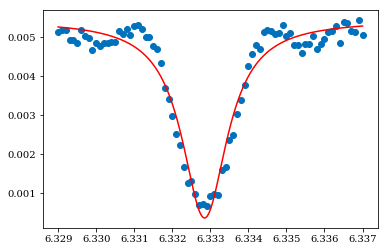

In [17]:
pars = lmfit.Parameters()
pars.add('center', data.x[data.y.argmin()],1,data.x.min(),data.x.max())
pars.add('width', 1e-3,min=0,max=1)
pars.add('offset',data.y.max(),min=0)
pars.add('amplitude',1e-3)

result = lmfit.minimize(minf,pars,args=(data.x,data.y))

plt.plot(data.x,data.y,'o')
x2 = np.linspace(data.x[0],data.x[-1],501)
plt.plot(x2,single_lorentzian(result.params,x2),'r')

In [18]:
lmfit.report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 81
    # variables        = 4
    chi-square         = 8.6392e-06
    reduced chi-square = 1.1220e-07
    Akaike info crit   = -1292.34554
    Bayesian info crit = -1282.76775
[[Variables]]
    center:     6.33284776 +/- 2.0091e-05 (0.00%) (init = 6.3329)
    width:      7.2577e-04 +/- 3.9293e-05 (5.41%) (init = 0.001)
    offset:     0.00542283 +/- 6.8323e-05 (1.26%) (init = 0.005420978)
    amplitude: -0.00504652 +/- 1.4315e-04 (2.84%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(width, offset)     =  0.683
    C(width, amplitude)  =  0.354
    C(offset, amplitude) = -0.209
    C(center, amplitude) =  0.127


In [24]:
result.params['center']

<Parameter 'center', value=6.332847760427912 +/- 2.01e-05, bounds=[6.329:6.336999999999981]>

In [23]:
result.params['center'].value,result.params['center'].stderr

(6.332847760427912, 2.0090593401883467e-05)

# Another example

In [25]:
data = dm.load_datamodule('./sample_data/2018-08-06-cav-ex--44dBm.dm')
data.plot(plot_fit=0)

bokeh.plotting.figure.Figure(
    id='275efd34-1c3d-41fd-aa78-d9709a8c64c4',
    above=[],
    aspect_scale=1,
    background_fill_alpha={'value': 1.0},
    background_fill_color={'value': '#ffffff'},
    below=[bokeh.models.axes.LinearAxis(
         id='c88bcda0-c178-430d-adc1-c531296036ea',
         axis_label='x',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color={'value': '#444444'},
         axis_label_text_font='helvetica',
         axis_label_text_font_size={'value': '10pt'},
         axis_label_text_font_style='italic',
         axis_label_text_line_height=1.2,
         axis_line_alpha={'value': 1.0},
         axis_line_cap='butt',
         axis_line_color={'value': 'black'},
         axis_line_dash=[],
         axis_line_dash_offset=0,
         axis_line_join='bevel',
         axis_line_width={'value': 1},
         bounds='auto',
         fixed_location=None,
         formatter=bokeh.models.formatters.BasicTickFormatter(
             id='b8927a01-6efc-4117-a78d-dd0321483606',
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             power_limit_high=5,
             power_limit_low=-3,
             precision='auto',
             subscribed_events=[],
             tags=[],
             use_scientific=True),
         js_event_callbacks={},
         js_property_callbacks={},
         level='overlay',
         major_label_orientation='horizontal',
         major_label_overrides={},
         major_label_standoff=5,
         major_label_text_align='center',
         major_label_text_alpha={'value': 1.0},
         major_label_text_baseline='alphabetic',
         major_label_text_color={'value': '#444444'},
         major_label_text_font='helvetica',
         major_label_text_font_size={'value': '8pt'},
         major_label_text_font_style='normal',
         major_label_text_line_height=1.2,
         major_tick_in=2,
         major_tick_line_alpha={'value': 1.0},
         major_tick_line_cap='butt',
         major_tick_line_color={'value': 'black'},
         major_tick_line_dash=[],
         major_tick_line_dash_offset=0,
         major_tick_line_join='bevel',
         major_tick_line_width={'value': 1},
         major_tick_out=6,
         minor_tick_in=0,
         minor_tick_line_alpha={'value': 1.0},
         minor_tick_line_cap='butt',
         minor_tick_line_color={'value': 'black'},
         minor_tick_line_dash=[],
         minor_tick_line_dash_offset=0,
         minor_tick_line_join='bevel',
         minor_tick_line_width={'value': 1},
         minor_tick_out=4,
         name=None,
         plot=bokeh.plotting.figure.Figure(id='275efd34-1c3d-41fd-aa78-d9709a8c64c4', ...),
         subscribed_events=[],
         tags=[],
         ticker=bokeh.models.tickers.BasicTicker(
             id='8dc46b1c-fb62-48e8-8326-49e9b7abe444',
             base=10.0,
             desired_num_ticks=6,
             js_event_callbacks={},
             js_property_callbacks={},
             mantissas=[1, 2, 5],
             max_interval=None,
             min_interval=0.0,
             name=None,
             num_minor_ticks=5,
             subscribed_events=[],
             tags=[]),
         visible=True,
         x_range_name='default',
         y_range_name='default')],
    border_fill_alpha={'value': 1.0},
    border_fill_color={'value': '#ffffff'},
    css_classes=[],
    disabled=False,
    extra_x_ranges={},
    extra_y_ranges={},
    h_symmetry=True,
    height=None,
    hidpi=True,
    js_event_callbacks={},
    js_property_callbacks={},
    left=[bokeh.models.axes.LinearAxis(
         id='af54a513-aa25-4a8b-bbd5-d6803d53ea0d',
         axis_label='y',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_col

In [41]:
def multi_lorentzian(pars,x):
    tot = np.zeros(len(x))
    for i in range(pars['peaks_number'].value): #no spaces allowed, value called explicitly because it must be an integer
    
        x2 = x-pars['center{}'.format(i+1)]
        y = pars['width{}'.format(i+1)]**2/(x2**2 +pars['width{}'.format(i+1)]**2 )  
        tot+=y*pars['amplitude{}'.format(i+1)]
    
    return tot+pars['offset']

def minf(pars,x,y):
    return y-multi_lorentzian(pars,x)

In [83]:
pars = lmfit.Parameters()

pars.add('peaks_number',2,False) #fixed

pars.add('center1', 6.3325)
pars.add('width1', 1e-3,min=0,max=1)
pars.add('offset',data.y.max(),min=0)
pars.add('amplitude1',-3e-3)

pars.add('center2', 6.33)
pars.add('width2', 1e-3,min=0,max=1)
pars.add('amplitude2',-2e-3)

pars.add('center3', 6.327)
pars.add('width3', 1e-3,min=0,max=1)
pars.add('amplitude3',-2e-3)





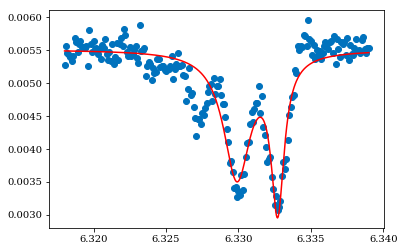

In [84]:
result = lmfit.minimize(minf,pars,args=(data.x,data.y))

plt.plot(data.x,data.y,'o')
x2 = np.linspace(data.x[0],data.x[-1],501)
plt.plot(x2,multi_lorentzian(result.params,x2),'r')

In [85]:


pars.add('peaks_number',3,False) #fixed



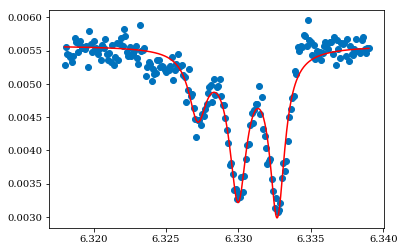

In [86]:
result = lmfit.minimize(minf,pars,args=(data.x,data.y))

plt.plot(data.x,data.y,'o')
x2 = np.linspace(data.x[0],data.x[-1],501)
plt.plot(x2,multi_lorentzian(result.params,x2),'r')

In [87]:

pars.add('peaks_number',4,False) #fixed


pars.add('center4', 6.324)
pars.add('width4', 1e-3,min=0,max=1)
pars.add('amplitude4',-1e-3)

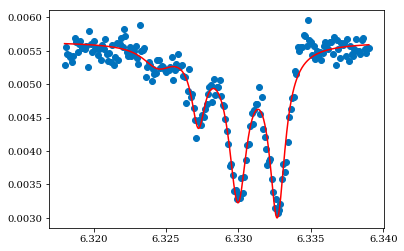

In [88]:
result = lmfit.minimize(minf,pars,args=(data.x,data.y))

plt.plot(data.x,data.y,'o')
x2 = np.linspace(data.x[0],data.x[-1],501)
plt.plot(x2,multi_lorentzian(result.params,x2),'r')